In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [5]:
from keras.preprocessing.text import text_to_word_sequence

def num_of_words(question):
    question = str(question)
    return len(text_to_word_sequence(question))

def add_word_count(df):
    df['count1'] = df.question1.apply(num_of_words)
    df['count2'] = df.question2.apply(num_of_words)
    return df

df_train = add_word_count(df_train)
df_test = add_word_count(df_test)


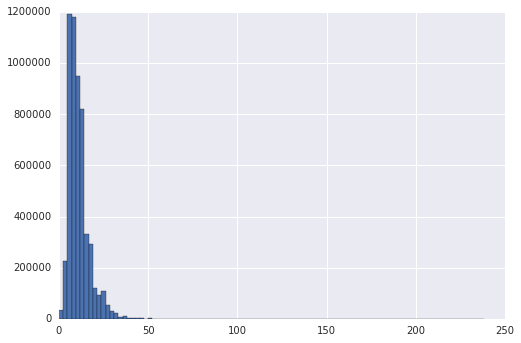

In [13]:
counts = np.concatenate([df_train.count1,df_train.count2,df_test.count1,df_test.count2],axis=0)
plt.hist(counts,bins=100);

In [19]:
np.percentile(counts,99.9)

50.0

In [26]:
df_train[df_train.count1>50]

,id,qid1,qid2,question1,question2,is_duplicate,count1,count2
1614,1614,3214,3215,How often should I massage my face with Argan ...,Which one should I use: olive oil or coconut o...,0,66,12
3961,3961,7845,7846,I've been learning piano since I was 12 years ...,I've played piano for 11 years and violin for ...,0,52,28
4084,4084,8084,8085,"I like my job and boss a lot, but I am underpa...",I don't love my current job but I don't have a...,0,52,19
4607,4607,9100,9101,I work on volume reconstruction in electron mi...,How do I use the DLL file converted from a MAT...,0,51,14
4768,4768,9416,9417,I am a 25-year-old girl and still single. I'm ...,"I am 26, a woman, and one who wishes to remain...",0,57,46
5703,5703,11210,11211,I used to be a very bright student at the time...,Even after studying for hours daily I was not ...,0,52,37
11983,11983,23121,23122,A crew team rows a boat at a rate of 20 km/h i...,A crew team rows a boat at a rate of 20 km/h i...,0,62,60
12604,12604,24273,24274,I am unable to attach files in Gmail; I opened...,My Android gallery app won't open. What can I ...,0,51,15
13139,13139,25253,25254,If a guy asks me if he should die and I tell h...,If an employee get sick during the job does he...,0,56,24
14671,14671,28085,28086,"I am preparing for IITJEE, and I love physics ...","I have only four hours in a day, how can I pre...",0,57,15


In [27]:
df_train.describe()

,id,qid1,qid2,is_duplicate,count1,count2
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198,11.033785,11.278881
std,116708.614502,157751.700002,159903.182629,0.482588,5.499478,6.377196
min,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000,7.000000,7.000000
50%,202144.500000,192182.000000,197052.000000,0.000000,10.000000,10.000000
75%,303216.750000,346573.500000,354692.500000,1.000000,13.000000,13.000000
max,404289.000000,537932.000000,537933.000000,1.000000,127.000000,237.000000


In [33]:
df_train[df_train.count2<2]

,id,qid1,qid2,question1,question2,is_duplicate,count1,count2
20072,20072,37898,37899,How could I solve this?,…………..,0,5,1
46596,46596,83328,83329,How To Edit DNA?,What?,0,4,1
47056,47056,84067,84068,Is there anywhere in the world offering pain m...,?,0,19,0
51909,51909,92003,83329,What should yellow taxis do to face competitio...,What?,0,12,1
74304,74304,127360,127361,Is there any chances for hailstones tomorrow?,parisflatlist,0,7,1
105780,105780,174363,174364,How can I develop android app?,NaN,0,6,1
109009,109009,178981,178982,How do I make a box that I can put my phone in...,Hh,0,25,1
130637,130637,209606,209607,Does the Quran surah 23: 5-6 prove that Allah ...,Does?,0,17,1
141281,141281,147899,224327,Deleted.,null,0,1,1
144506,144506,228687,228688,How beautiful do you think you are?,Delete,0,7,1
